# The Perceptron

In this notebook, I will be introducing machine learning with a single neuron model called the Perceptron model. I will implement and train this model on the palmer_penguins dataset (which I have stored in the Datasets folder).

In [ ]:
# import the necessary libraries and a function for plotting decision boundaries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from mlxtend.plotting import plot_decision_regions

# Set the Seaborn theme
sns.set_theme()

# Read the palmer_penguins dataset into a pandas DataFrame object
df = pd.read_csv("Datasets/palmer_penguins.csv")

The Perceptron is used on binary classification problems. Thus, I need to choose two of the three penguin species to implement and train the perceptron on. I was inspired to pick this dataset after watching the show Atypical, whose protagonist Sam has a love for four species of Antarctic penguins: Adélie, Chinstrap, Emperor, and Gentoo. Since Chinstrap penguins are Sam's favorite, I must include them as one of the two species. For my purposes, I will focus on "Adelie" and "Chinstrap" penguin species. The data for these two species are contained in the first 219 rows of data in ```df```.

The perceptron can take in any number of feature measurments, but for simplicity I focus my attention on just two feature measurements, namely "bill length" and "bill depth". Moreover, I need to also convert the string names associated with each species to numerical values; for example, map "Adelie" species to -1 and "Chinstrap" species to 1. The following code preproccesses our data into these desired formats.

In [2]:
# Store the desired species values in the numpy array y
y = df.iloc[:219].species.values

# Convert each entry of y with Adelie to -1 and to 1 otherwise (for Chinstrap penguins)
y = np.where(y == 'Adelie', -1, 1)

# Store the desired feature measurements in the matrix X
X = df[["bill_length_mm", "bill_depth_mm"]].iloc[:219].values

The framework of a Python class is perfect for implementing a single neuron model since Python classes store data as class attributes and functions as class methods. Thus, below is a custom Python class that stores a scaling value for the cost function, the number of epochs when training, the weights (and bias), and the errors incured during training on a given instance. Moreover, this Python class will also contain a training method, a input method, and a predict method.

In [3]:
class Perceptron(object):
    """
    Perceptron classifier for binary classification tasks.

    This class implements a simple version of the Perceptron learning algorithm,
    which updates weights based on misclassified training examples. The algorithm 
    attempts to find a linear decision boundary that separates two classes.

    Attributes:
        eta (float): Learning rate (between 0.0 and 1.0).
        epochs (int): Number of passes over the training dataset.
        w_ (ndarray): Weight vector including bias term.
        errors_ (list): Number of misclassifications in each epoch.

    Methods:
        train(X, y): Fits the model to the training data.
        net_input(X): Computes the net input (weighted sum + bias).
        predict(X): Returns class label prediction for given input.
    """
    def __init__(self, eta=.5, epochs=50):
        self.eta = eta
        self.epochs = epochs
        
    def train(self, X, y):
        self.w_ = np.random.rand(1 + X.shape[1])
        
        self.errors_ = []
        
        for _ in range(self.epochs):
            errors = 0
            for xi, target in zip(X, y):
                update = self.eta * (self.predict(xi) - target)
                self.w_[:-1] -= update*xi
                self.w_[-1] -= update
                errors += int(update != 0)
            if errors == 0:
                return self
            else:
                self.errors_.append(errors)
            
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[:-1]) + self.w_[-1]
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0.0, 1, -1)

Next I can instantiate an instance of the ```Perceptron``` class and also train this instance over 10,000 epochs. After training has finished, I can call the ```Perceptron``` class ```predict``` method to view its current predictions given input features.

In [4]:
# Instantiate one instance of the Perceptron class
clf = Perceptron(epochs = 100_000)

# Call the train method to train the weights and bias of the given instance
clf.train(X, y)

# Predict labels on the features in X
y_hat = clf.predict(X)

# Compare y_hat and y
print(y == y_hat)

[ True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
 False  True  True False  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True False  True  True  True
  True  True  True  True  True  True  True  True  True  True False  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  T

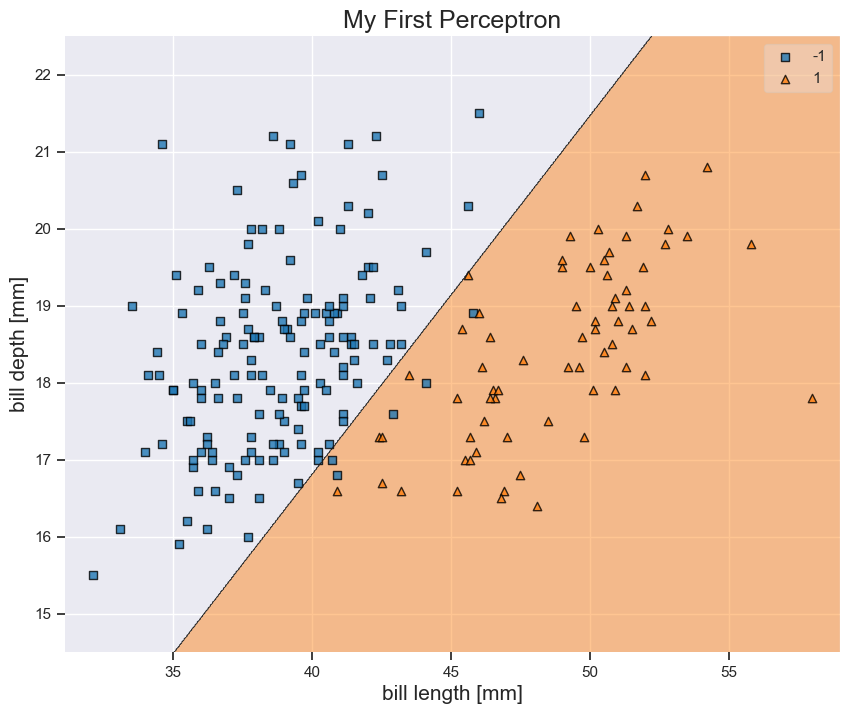

In [5]:
plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = clf)
plt.title("My First Perceptron", fontsize = 18)
plt.xlabel("bill length [mm]", fontsize = 15)
plt.ylabel("bill depth [mm]", fontsize = 15)
plt.show()

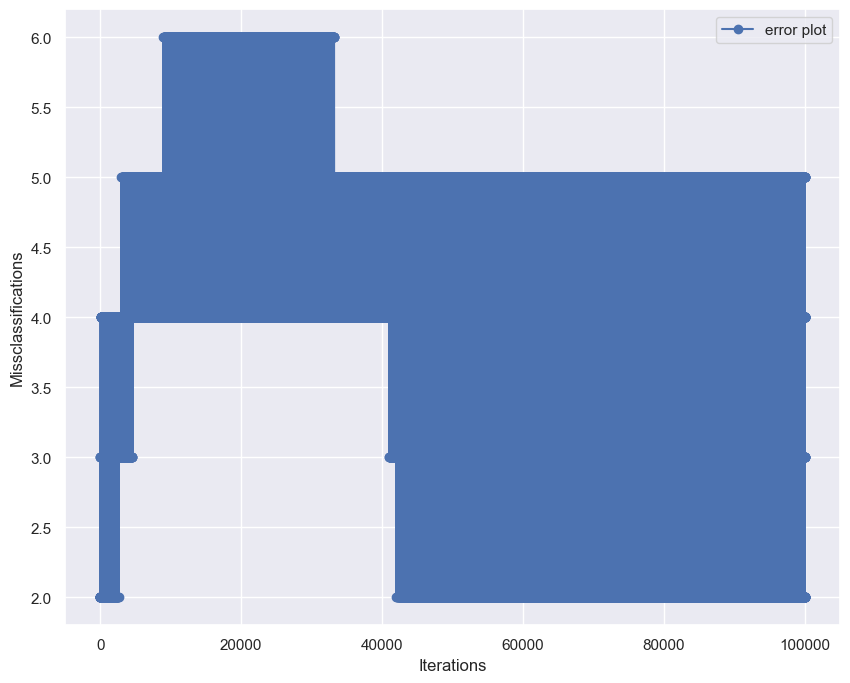

In [6]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, len(clf.errors_)+1), clf.errors_, marker = "o", label = "error plot",)
plt.xlabel("Iterations")
plt.ylabel("Missclassifications")
plt.legend()
plt.show()